## Alejandro Pulido Sánchez

# PRÁCTICA 9: PERCEPTRÓN SIMPLE y ADALINE

### Ejercicio 1

In [256]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, r2_score

<div class="alert alert-block alert-success">
Este código genera un conjunto de datos simulados para su uso en un problema de clasificación binaria. En particular, utiliza la función "make_blobs" de la biblioteca sklearn para generar dos grupos o "clusters" de datos, cada uno con 1000 muestras (n_samples=1000) y con dos características (n_features=2).

Los parámetros "centers" y "cluster_std" controlan la distribución de los grupos: "centers=2" indica que habrá dos centros o centroides de los grupos, y "cluster_std=0.55" indica que la desviación estándar de los puntos de cada grupo será de 0.55.

Por último, el parámetro "random_state=0" asegura que la generación de datos sea reproducible, es decir, que al volver a ejecutar el mismo código con el mismo valor de random_state se generarán los mismos datos.

El resultado final son dos arreglos NumPy, "X" y "y", que contienen las características y las etiquetas de clase respectivamente para cada una de las 1000 muestras generadas.

In [257]:
X, y =make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=0.55, random_state=0)

<div class="alert alert-block alert-success">
Se utilizan dos llamadas a la función "scatter" para dibujar los puntos de cada grupo. El primer "scatter" dibuja los puntos del grupo 0 (etiqueta y=0), que se extraen del arreglo "X" mediante la función "argwhere" de NumPy. La coordenada x se toma del primer elemento de cada par de coordenadas en X (X[:,0]), mientras que la coordenada y se toma del segundo elemento de cada par de coordenadas en X (X[:,1]). Los puntos se grafican en color rojo (c='r').

La segunda llamada a "scatter" hace lo mismo para los puntos del grupo 1 (etiqueta y=1), pero en este caso los puntos se grafican en color azul (c='b').

Finalmente, se utiliza la función "grid" para agregar una grilla al gráfico.

En resumen, este código proporciona una visualización de los datos de dos grupos generados por la función "make_blobs", donde los puntos de cada grupo se distinguen por su color.

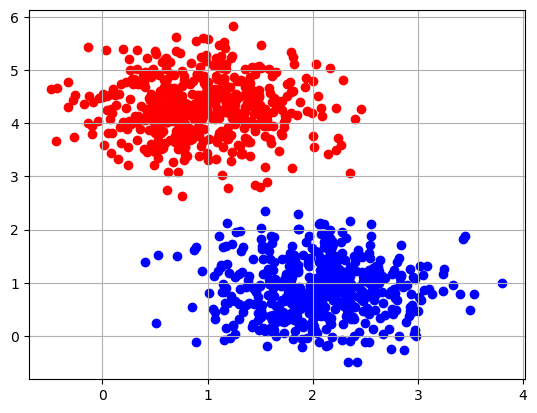

In [258]:
plt.scatter(X[np.argwhere(y==0), 0], X[np.argwhere(y==0), 1], c='r')
plt.scatter(X[np.argwhere(y==1), 0], X[np.argwhere(y==1), 1], c='b')
plt.grid()

In [259]:
X = MinMaxScaler().fit_transform(X)

<div class="alert alert-block alert-success">
Este código define una clase llamada "perceptron_simple" que implementa un perceptrón para resolver un problema de clasificación binaria. El perceptrón se entrena utilizando el algoritmo de aprendizaje del perceptrón simple, que ajusta los pesos y el sesgo del perceptrón para minimizar el error de clasificación.

El constructor de la clase toma los siguientes parámetros de entrada: el número de características de entrada (n_inputs), el número de clases de salida (n_outputs), los pesos del perceptrón (W) y el sesgo del perceptrón (b). Si no se proporcionan valores para W y b, se inicializan aleatoriamente mediante la función "rand" de NumPy.

La clase tiene tres métodos:

"predict" que realiza la predicción de clase para un conjunto de datos de entrada "x" utilizando los pesos y el sesgo del perceptrón.
"train" que entrena el perceptrón utilizando un conjunto de datos de entrada "X" y un conjunto de etiquetas de clase "D" mediante el algoritmo de aprendizaje del perceptrón simple.
"get_params" que devuelve los pesos y el sesgo del perceptrón entrenado.
El método "train" utiliza un bucle while para entrenar el perceptrón hasta que todas las muestras estén correctamente clasificadas. Dentro del bucle, se elige aleatoriamente una muestra de entrada y se actualizan los pesos y el sesgo del perceptrón utilizando el algoritmo de aprendizaje del perceptrón simple. El bucle continúa hasta que todas las muestras estén correctamente clasificadas o hasta que se alcance un número máximo de iteraciones.

In [260]:
class perceptron_simple():
    def __init__(self, n_inputs=2, n_outputs=1, W=None, b=None):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.W = W
        self.b = b
        if self.W is None:
            self.W = np.random.rand(self.n_outputs, self.n_inputs)-0.5
        if self.b is None:
            self.b = np.random.rand(self.n_outputs, 1)-0.5
    def predict(self, x):
        return np.sign(self.W @ x.T + self.b).T.astype(int)
    def train(self, X, D):
        if np.sum(self.predict(X) == D) != D.shape[0]:
            continuar = True
            p = 0
            while continuar:
                v = p % X.shape[0]
                x = X[v].reshape(1,-1)
                y = self.predict(x)
                d = D[v].reshape(1,-1)
                if y != d:
                    self.W += d * x
                    self.b += d
                    if np.sum(self.predict(X) == D) == D.shape[0]:
                        continuar = False
                p += 1
        return
    def get_params(self):
        return self.W, self.b

<div class="alert alert-block alert-success">
Este código es una operación de preprocesamiento de los datos.

En particular, dado un arreglo "y" que contiene etiquetas de clase binarias (es decir, 0 o 1), se utiliza la función "argwhere" de NumPy para encontrar los índices de las entradas en "y" que tienen una etiqueta igual a 0. Luego, se utiliza la indexación de NumPy para asignar el valor -1 a esas entradas de "y" que tienen una etiqueta igual a 0.

La razón detrás de esto es que algunos algoritmos de aprendizaje automático, como el perceptrón y la SVM con margen suave, funcionan mejor si las etiquetas de clase son -1 y 1 en lugar de 0 y 1. Por lo tanto, este código es una forma de transformar las etiquetas de clase de 0 y 1 a -1 y 1, respectivamente, lo que puede mejorar el rendimiento de ciertos algoritmos de aprendizaje automático.

In [261]:
y[np.argwhere(y==0)] = -1

<div class="alert alert-block alert-success">
Este código crea un objeto de la clase "perceptron_simple" llamado "ps" con dos características de entrada (n_inputs = 2) y una salida (n_outputs = 1). Luego, se entrena el perceptrón utilizando los datos de entrada "X" y las etiquetas de clase transformadas "y.reshape(-1,1)" utilizando el método "train" de la clase. Después del entrenamiento, se obtienen los pesos y el sesgo del perceptrón entrenado utilizando el método "get_params" y se asignan a las variables "pesos" y "bias", respectivamente.

In [262]:
ps = perceptron_simple(n_inputs=2, n_outputs=1)
ps.train(X,y.reshape(-1,1)) # (1000,) reshape a (1000,1)
pesos, bias = ps.get_params()

<div class="alert alert-block alert-success">
Este código grafica los datos de entrada "X" y las etiquetas de clase transformadas "y.reshape(-1,1)". Los puntos con etiqueta 1 se muestran en azul y los puntos con etiqueta -1 se muestran en rojo. Además, se grafica la línea de separación encontrada por el perceptrón entrenado.

En particular, después de establecer el rango de los ejes x e y y agregar etiquetas a los ejes x, el código calcula la línea de separación encontrada por el perceptrón entrenado utilizando los pesos y el sesgo almacenados en "pesos" y "bias". Se utiliza la ecuación de la línea (pesos[0,1]*x + pesos[0,0]*y + bias[0,0] = 0) para encontrar los valores de x2 que corresponden a los valores extremos de x1 (0 y 1). Luego, se grafica la línea de separación en verde utilizando la función "plot" de Matplotlib.

<function matplotlib.pyplot.show(close=None, block=None)>

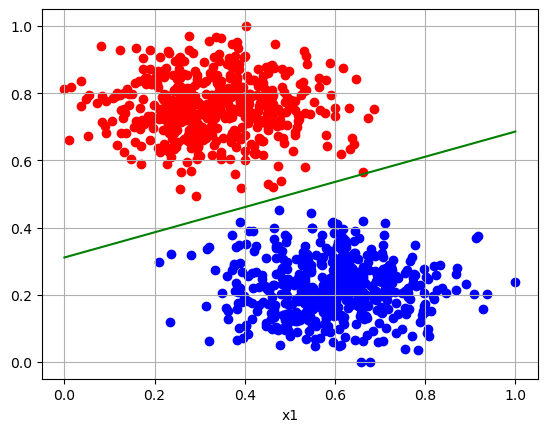

In [263]:
plt.scatter(X[np.argwhere(y==1),0], X[np.argwhere(y==1),1],c = 'blue')
plt.scatter(X[np.argwhere(y==-1),0], X[np.argwhere(y==-1),1], c = 'red')
plt.xlabel('x1')

plt.xlim=((0,1))
plt.ylim=((0,1))
plt.grid()
x1=np.array([0.0,1.0])
x2=np.array([-bias[0,0]/pesos[0,1],(-bias[0,0]-pesos[0,0])/pesos[0,1]])
plt.plot(x1,x2,c='green')
plt.show

### Ejercicio 2

In [264]:
from sklearn.datasets import load_boston


In [265]:
boston = load_boston()

/home/alejandro/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

<div class="alert alert-block alert-success">
El siguiente código normaliza las características de entrada de los datos de Boston Housing y los almacena en "X_boston", y almacena las etiquetas de salida en "y_boston".

In [266]:
escaler = MinMaxScaler()

In [267]:
X_boston = escaler.fit_transform(boston.data)
y_boston = boston.target
X_boston.shape, y_boston.shape

((506, 13), (506,))

<div class="alert alert-block alert-success">
En lso siguientes fragmentos de código se crea un objeto "tabla" de la clase "DataFrame" de pandas, que se usará para almacenar los resultados de la evaluación del modelo. Se definen las columnas de la tabla como "R2" y "Accuracy". También se establece el nombre del índice de la tabla como "Fold".

Luego, se itera a través de los pliegues generados por la función "KFold" para dividir los datos de entrada en conjuntos de entrenamiento y prueba. En cada iteración, se crea un objeto "reg" de la clase "SGDRegressor" de Sklearn, que se ajusta a los datos de entrenamiento utilizando el método "fit". Se realiza la predicción de la etiqueta de salida del conjunto de prueba utilizando el método "predict". Luego, se calculan el coeficiente de determinación R^2 y el error de precisión en la predicción y se agregan a la tabla.

Después de que se han realizado todas las iteraciones, la tabla final se devuelve como resultado. En resumen, este código realiza una validación cruzada en los datos de Boston Housing utilizando un modelo de regresión lineal de descenso de gradiente estocástico y almacena los resultados de evaluación en una tabla.

In [268]:
K = 10
kf = KFold(n_splits=K)

In [269]:
tabla = pd.DataFrame( columns=["R2","Accuracy"])
tabla.index.name = "Fold"

In [270]:
i = 0
for train_index, test_index in cv.split(X_boston):
    reg=SGDRegressor(max_iter=5000, tol=1e-6)
    reg.fit(X_boston[train_index, :], y_boston[train_index])
    y_predict = reg.predict(X_boston[test_index, :])
    error = np.mean(np.abs((y_predict - y_boston[test_index])/y_boston[test_index]) < 0.15)
    tabla.loc[i,:] = [r2_score(y_boston[test_index], y_predict), error]
    i += 1
tabla

,R2,Accuracy
Fold,,
0,0.772903,0.764706
1,0.649329,0.764706
2,-0.228556,0.705882
3,0.614947,0.607843
4,0.546799,0.588235
5,0.746116,0.745098
6,0.435513,0.66
7,0.078026,0.24
8,-0.468969,0.36


<div class="alert alert-block alert-success">
El siguiente código calculará el promedio y la desviación de los valores en cada columna de la tabla de resultados tabla

In [271]:
tabla.mean()

R2          0.357636
Accuracy    0.603647
dtype: float64

In [272]:
tabla.std()

R2          0.425161
Accuracy    0.175559
dtype: float64